<a href="https://www.kaggle.com/code/aabdollahii/life-expectancy?scriptVersionId=252777717" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-analysis/new_df.xlsx
/kaggle/input/life-expectancy-analysis/life_expectancy_cleaned_dataset.xlsx
/kaggle/input/life-expectancy-analysis/Life Expectancy Data.csv


First we have to read csv file and extract some data from the dataset


In [2]:
import pandas as pd 
import numpy as np 

df = pd.read_csv("/kaggle/input/life-expectancy-analysis/Life Expectancy Data.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.shape

(2938, 22)

**As we see we have 2938 rows**

In [5]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [7]:
# Step 1: Ensure it's string
df['Status'] = df['Status'].astype(str)

# Step 2: Clean whitespace and capitalize
df['Status'] = df['Status'].str.strip().str.capitalize()

# Step 3: Replace values with numeric
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

# Step 4: Check results
print(df['Status'].unique())

[0 1]


In [8]:
for col in df.columns:
    if df[col].isnull().any() and df[col].dtype in [np.float64, np.int64]:
        df[col] = df.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

In [9]:
# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')



In [10]:
# 5. Fill remaining NaNs with global median (in case entire country column was NaN)
df.fillna(df.median(numeric_only=True), inplace=True)

In [11]:
# 6. Confirm no NaNs remain
print("--- Missing Values After Cleaning ---")
print(df.isnull().sum().sort_values(ascending=False))

--- Missing Values After Cleaning ---
Country                            0
Year                               0
Income_composition_of_resources    0
thinness_5_9_years                 0
thinness__1_19_years               0
Population                         0
GDP                                0
HIV/AIDS                           0
Diphtheria                         0
Total_expenditure                  0
Polio                              0
under_five_deaths                  0
BMI                                0
Measles                            0
Hepatitis_B                        0
percentage_expenditure             0
Alcohol                            0
infant_deaths                      0
Adult_Mortality                    0
Life_expectancy                    0
Status                             0
Schooling                          0
dtype: int64


# EDA (distribution plots, correlations)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


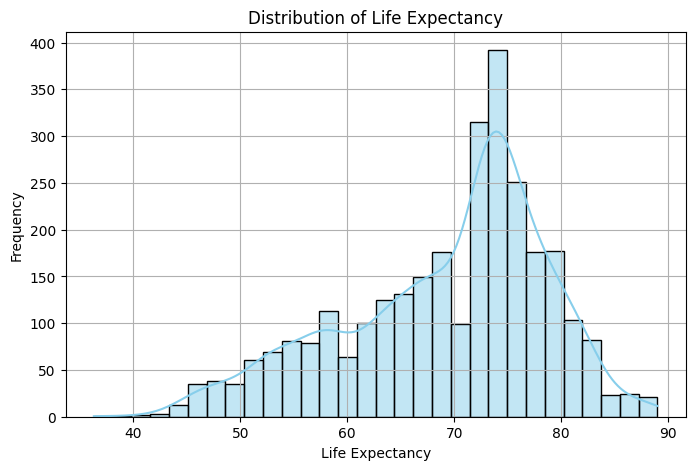

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['Life_expectancy'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The distribution is *bimodal*, meaning it has two distinct peaks.The first peak (smaller but noticeable) appears to be roughly around 55-60 years of life expectancy.The second, much larger and more prominent peak is around 74-76 years of life expectancy.This bimodal nature suggests that there might be two distinct groups or populations contributing to the life expectancy data, each with its own central tendency for life expectancy.

Spread/Variability:The data spans a wide range, from approximately 35 years to nearly 90 years.

Skewness:The overall distribution appears to be left-skewed (negatively skewed), particularly due to the presence of the tail extending towards lower life expectancies from the primary peak, and the first peak itself contributing to this leftward spread. While the main peak (74-76) is somewhat symmetrical, the entire dataset has a longer tail on the left side.




In [13]:
df.describe()

,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1_19_years,thinness_5_9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,0.174268,69.234717,164.725664,30.303948,4.595810,738.251295,79.155487,2419.592240,38.381178,...,82.396266,5.919053,82.183944,1.742103,6599.353065,1.023389e+07,4.821886,4.852144,0.630362,12.009837
std,4.613841,0.379405,9.509115,124.086215,117.926501,4.027821,1987.914858,24.660198,11467.272489,19.935375,...,23.476067,2.455824,23.743205,5.077785,13302.208350,5.402193e+07,4.397621,4.485854,0.205140,3.265139
min,2000.000000,0.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,0.000000,63.200000,74.000000,0.000000,0.930000,4.685343,73.500000,0.000000,19.400000,...,78.000000,4.280000,78.000000,0.100000,562.082880,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,0.000000,72.100000,144.000000,3.000000,3.730000,64.912906,89.000000,17.000000,43.500000,...,93.000000,5.745333,93.000000,0.100000,1726.915100,1.396073e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,0.000000,75.600000,227.000000,22.000000,7.677500,441.534144,96.000000,360.250000,56.100000,...,97.000000,7.430000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Status : Mean --> 0.174268. Since it's likely a binary variable (e.g., 0 for "Developing" and 1 for "Developed" status, or vice-versa), this mean suggests that approximately 17.4% of the observations belong to the category represented by '1'. 
This is a crucial variable given the bimodal distribution of Life Expectancy we have seen before. It strongly supports the hypothesis that the bimodal distribution is driven by these two "Status" categories.

**Life_expectancy: (Target variable, as seen in the plot)**
Mean: 69.23 years.
Std Dev: 9.51 years. This is a relatively high standard deviation, consistent with the wide range and bimodal nature of the distribution.
Median (50%): 72.1 years. Notice the mean (69.23) is lower than the median (72.1). This indicates a left-skewed distribution for the entire dataset, which aligns with the histogram showing a long tail towards lower life expectancies. The higher frequency of data points at higher life expectancies pulls the median up relative to the mean.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


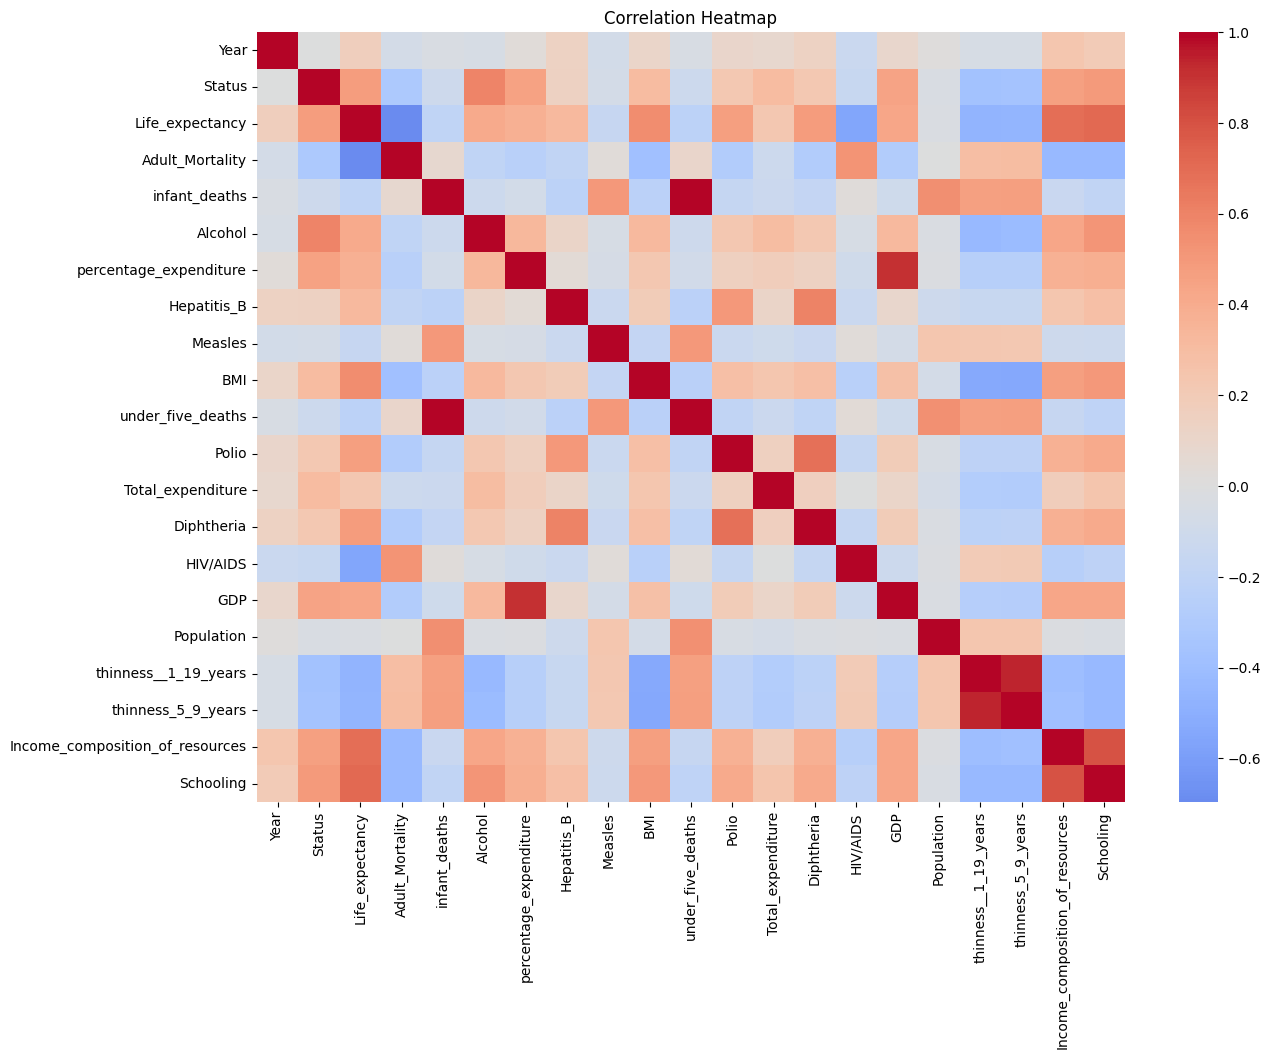

In [14]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
cor_target = corr_matrix['Life_expectancy'].sort_values(ascending=False)
print(cor_target)

Life_expectancy                    1.000000
Schooling                          0.713054
Income_composition_of_resources    0.688662
BMI                                0.556901
Diphtheria                         0.483609
Status                             0.481415
Polio                              0.470416
GDP                                0.431619
Alcohol                            0.405080
percentage_expenditure             0.381418
Hepatitis_B                        0.322708
Total_expenditure                  0.227268
Year                               0.170819
Population                        -0.029015
Measles                           -0.157767
infant_deaths                     -0.196769
under_five_deaths                 -0.222738
thinness_5_9_years                -0.462473
thinness__1_19_years              -0.468002
HIV/AIDS                          -0.556703
Adult_Mortality                   -0.696390
Name: Life_expectancy, dtype: float64


Schooling (0.713054): This is the strongest positive predictor. Higher average years of schooling are strongly associated with higher life expectancy. This is intuitively sensible, as education often correlates with better health literacy, economic opportunities, and access to healthcare

Income_composition_of_resources (0.688662): A very strong positive correlation. This variable likely represents a composite measure of a country's wealth and resource availability, which directly impacts living standards, nutrition, and healthcare.

Adult_Mortality (-0.696390): The strongest negative correlation. Higher adult mortality rates (probability of dying between 15-60 years per 1000 people) are very strongly associated with lower life expectancy. This is a direct and intuitive relationship.



# Scale Features

Why? GDP can be thousands or millions but BMI is a small float number 

In [16]:
# Check: if 'Country' was encoded, maybe it became part of the index — drop it safely
if 'Country' in df.columns:
    df = df.drop(columns=['Country'])

# Define features and target again
X = df.drop(columns=['Life_expectancy'])  # adjust if column name differs
y = df['Life_expectancy']

# Train-test split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale only numeric features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now fit Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

#prediction
y_pred = rf.predict(X_test_scaled)


*Evaluate the model*

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1.062406462585034
Mean Squared Error (MSE): 2.7014767840136034
Root Mean Squared Error (RMSE): 1.6436169821505262
R² Score: 0.9688293653036799


As we can see numers are good XD

**Viz Prediction**

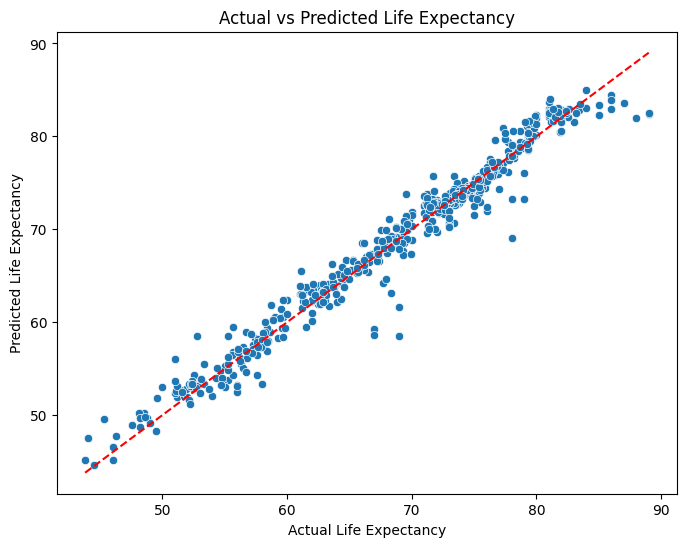

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


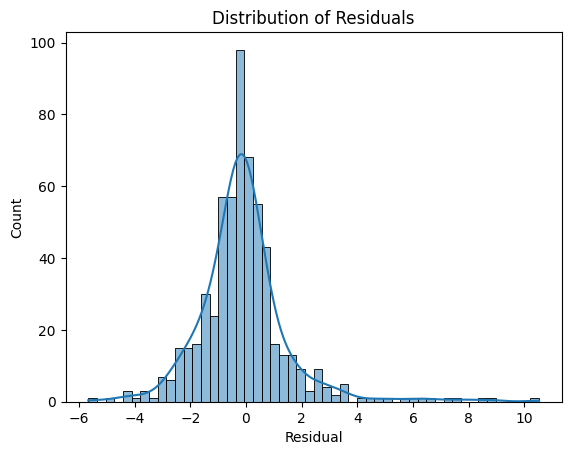

In [19]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()


# trying all the models

In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, rmse, r2))

# Display results
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2 Score"])
print(results_df.sort_values(by="R2 Score", ascending=False))


              Model       MAE      RMSE  R2 Score
4      RandomForest  1.062406  1.643617  0.968829
5  GradientBoosting  1.497673  2.078613  0.950147
6               KNN  1.787347  2.547055  0.925145
3      DecisionTree  1.573129  2.586096  0.922833
7               SVR  2.229922  3.221619  0.880245
0  LinearRegression  2.855071  3.908151  0.823767
1             Ridge  2.856830  3.913367  0.823296
2             Lasso  3.211408  4.421668  0.774412


As we can see the best option is random forest until now.May be later I tried other models.